In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [53]:
N = 10
ba = nx.barabasi_albert_graph(N, m=2)
adj = [(n, list(nbrdict.keys())) for n, nbrdict in ba.adjacency()]
adj

[(0, [1, 2, 3, 5, 6, 7, 9]),
 (1, [0, 4, 7]),
 (2, [0, 3, 4, 6, 8, 9]),
 (3, [0, 2, 8]),
 (4, [1, 2, 5]),
 (5, [0, 4]),
 (6, [0, 2]),
 (7, [0, 1]),
 (8, [2, 3]),
 (9, [0, 2])]

In [54]:
exchange_time = 1000
for t in range(exchange_time):
    print(f"we are performing {t} times exchange")
    # pick A
    a = np.random.randint(0, N)
    # pick B
    b_i = np.random.randint(0, len(adj[a][1]))
    b = adj[a][1][b_i]

    # pick C
    c = np.random.randint(0, N)
    cont = 0
    while c in adj[a][1] or c in adj[b][1]:
        c = np.random.randint(0, N)
        cont += 1
        if cont >= 100:
            break
    if cont >= 100:
        print('Ka zhu le')
        continue
    # pick D
    d = -1
    for n in adj[c][1]:
        if n not in adj[a][1] and n not in adj[b][1]:
            d = n
            break

    # not get a d, then re-do
    # else, do switch
    if d == -1:
        continue
    else:
        # cut
        adj[a][1].remove(b)
        adj[b][1].remove(a)
        adj[c][1].remove(d)
        adj[d][1].remove(c)

        adj[a][1].append(d)
        adj[d][1].append(a)
        adj[c][1].append(b)
        adj[b][1].append(c)
adj

we are performing 0 times exchange
we are performing 1 times exchange
we are performing 2 times exchange
we are performing 3 times exchange
we are performing 4 times exchange
we are performing 5 times exchange
we are performing 6 times exchange
we are performing 7 times exchange
we are performing 8 times exchange
we are performing 9 times exchange
we are performing 10 times exchange
Ka zhu le
we are performing 11 times exchange
we are performing 12 times exchange
we are performing 13 times exchange
we are performing 14 times exchange
we are performing 15 times exchange
we are performing 16 times exchange
we are performing 17 times exchange
we are performing 18 times exchange
we are performing 19 times exchange
we are performing 20 times exchange
we are performing 21 times exchange
we are performing 22 times exchange
we are performing 23 times exchange
we are performing 24 times exchange
we are performing 25 times exchange
we are performing 26 times exchange
we are performing 27 times e

[(0, [2, 4, 1, 6, 5, 8, 3]),
 (1, [0, 2, 7]),
 (2, [0, 7, 3, 5, 1, 9]),
 (3, [2, 0, 9]),
 (4, [0, 6, 8]),
 (5, [0, 2]),
 (6, [0, 4]),
 (7, [2, 1]),
 (8, [0, 4]),
 (9, [3, 2])]

In [46]:
a = [[1, 2],
 [0, 3, 4, 6],
 [0, 3],
 [1, 2, 4, 5, 6, 7, 8, 9],
 [1, 3, 5, 7],
 [3, 4, 8],
 [1, 3, 9],
 [3, 4],
 [3, 5],
 [3, 6]]
a

[[1, 2],
 [0, 3, 4, 6],
 [0, 3],
 [1, 2, 4, 5, 6, 7, 8, 9],
 [1, 3, 5, 7],
 [3, 4, 8],
 [1, 3, 9],
 [3, 4],
 [3, 5],
 [3, 6]]

In [62]:
def generator(N, m):
    """
    generate the network
    :param N: number of nodes
    :param m: new node has m links
    :return:
    """

    # randomly generate the C and D
    identity = np.ones(N, dtype=int)
    Cs = np.random.choice(N, N // 2, replace=False)
    for i in Cs:
        identity[i] = 0  # 0 - C, 1 - D

    # generate a BA network with 4000 nodes and <k> = 2m = 4
    ba = nx.barabasi_albert_graph(N, m, seed=666)
    # ba = nx.scale_free_graph(N)

    # nodes
    nodes = [i for i in range(N)]

    # get the neighbours for each vert [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
    adj = [(n, list(nbrdict.keys())) for n, nbrdict in ba.adjacency()]


    # do the exchange
    exchange_time = 3 * N
    for t in range(exchange_time):
        # pick A
        a = np.random.randint(0, N)
        # pick B
        b_i = np.random.randint(0, len(adj[a][1]))
        b = adj[a][1][b_i]

        # pick C
        c = np.random.randint(0, N)
        cont = 0
        while c in adj[a][1] or c in adj[b][1]:
            c = np.random.randint(0, N)
            cont += 1
            if cont >= 100:
                break
        if cont >= 100:
            continue
        # pick D
        d = -1
        for n in adj[c][1]:
            if n not in adj[a][1] and n not in adj[b][1]:
                d = n
                break

        # not get a d, then re-do
        # else, do switch
        if d == -1:
            continue
        else:
            # cut
            adj[a][1].remove(b)
            adj[b][1].remove(a)
            adj[c][1].remove(d)
            adj[d][1].remove(c)

        adj[a][1].append(d)
        adj[d][1].append(a)
        adj[c][1].append(b)
        adj[b][1].append(c)


    # get the degrees [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
    degrees = list(ba.degree())

    return ba, adj, identity, degrees, nodes


def cal_gain(node, b, adj, identity):
    """
    calculate gain for the given node
    :param node: the node i
    """
    neighbours = adj[node][1]
    gain = 0
    idi = identity[node]
    for n in neighbours:
        idj = identity[n]
        if idi == idj and idi == 0:
            gain += 1
        elif idi == 1 and idj == 0:
            gain += b
    return gain


def update1(nodei, nodej, b, gains, identity, degrees):
    if gains[nodei] < gains[nodej]:
        beta = 1 / (max(degrees[nodei][1], degrees[nodei][1]) * b)
        dice = np.random.rand()
        # dice <= beta means accept
        if dice <= beta:
            identity[nodei] = identity[nodej]


def update2(nodei, nodej, b, gains, records, identity, degrees):
    """
    compare nodei's gain with its neighbour nodej, and find out
    how to udpate nodei's od
    :param records: records of the numebr of pc, pd, f
    :param nodei: nodei
    :param nodej: nodej
    :return:
    """
    pc = records[0]
    pd = records[1]
    f = records[2]
    if gains[nodei] < gains[nodej]:
        beta = 1 / (max(degrees[nodei][1], degrees[nodei][1]) * b)
        dice = np.random.rand()
        # dice <= beta means accept
        if dice <= beta:
            idi = identity[nodei]
            idj = identity[nodej]
            # if i and j have different id and i will change
            if idi != idj:
                if idi == 0:
                    pc[nodei] = 0
                elif idi == 1:
                    pd[nodei] = 0
                f[nodei] = 1
            identity[nodei] = identity[nodej]


def choose_neighbor(nodei, adj):
    """
    choose the node j for the node compare the gain
    :param nodei: the node we need to find a neighbour for
    :return: the neighbour chosen randomly
    """
    neighbors = adj[nodei][1]
    dice = np.random.randint(0, len(neighbors))
    return neighbors[dice]


# generate the b values
# bs = np.arange(1, 5.8, 0.1)
bs = np.arange(1, 2, 0.1)
# transient time
t0 = 5000
# get steady
t1 = 1000
# after steady
ts = 10000

N = 4000
m = 2

s_all = time.time()


# for b in bs:

def iter(N, m, c_means, pcs, pds, fs, b, nodes, adj, identity, degrees):
    print(f'b = {b} start.')
    sb = time.time()


    # pre-evo
    for t in range(t0):
        # calculate gain
        gains = dict()
        for node in nodes:
            gains[node] = cal_gain(node, b, adj, identity)
        # update
        for node in nodes:
            nodej = choose_neighbor(node, adj)
            update1(node, nodej, b, gains, identity, degrees)

    # get steady
    key = True
    for t in range(t1):
        oldc = N - np.sum(identity)
        # calculate gain
        gains = dict()
        for node in nodes:
            gains[node] = cal_gain(node, b, adj, identity)
        # update
        for node in nodes:
            nodej = choose_neighbor(node, adj)
            update1(node, nodej, b, gains, identity, degrees)
        newc = N - np.sum(identity)
        # find out reach steady state or not
        if key:
            if abs(newc - oldc) < 1 / np.sqrt(N):
                print(f'we have reached the steady state after {t} times evolution.')
                key = False
    c_means.append((b, (N - np.sum(identity)) / N))
    # pc, pd, f will all have N elements
    # if born as c or d, in pc, pd the elements on the same pos will be 1, 0 otherwise
    # if change id, the pos in f will be 1
    # calculate the sum of these list will give the number of node in these classes
    pc = np.zeros(N)
    pd = np.zeros(N)
    f = np.zeros(N)
    for node in range(N):
        if identity[node] == 0:
            pc[node] = 1
        else:
            pd[node] = 1
    records = [pc, pd, f]
    for t in range(ts):

        # calculate gain
        gains = dict()
        for node in nodes:
            gains[node] = cal_gain(node, b, adj, identity)
        # update
        for node in nodes:
            nodej = choose_neighbor(node, adj)
            update2(node, nodej, b, gains, records, identity, degrees)



    eb = time.time()

    pcs.append((b, np.sum(records[0])))
    pds.append((b, np.sum(records[1])))
    fs.append((b, np.sum(records[2])))
    print(f'The time we used for b = {b} is {eb - sb}s.')

In [63]:

bs = np.arange(1, 2, 0.1)
# transient time
t0 = 500
# get steady
t1 = 100
# after steady
ts = 1000

N = 4000
m = 2

In [64]:
c_means = list()
pcs = list()
# record for the number of PD
pds = list()
# record for the number of F
fs = list()
s = time.time()
ba, adj, identity, degrees, nodes = generator(N, m)

for b in bs:
    iter(N, m, c_means, pcs, pds, fs, b, nodes, adj, identity, degrees)


print(f'all time is {time.time() - s} s')

b = 1.0 start.
we have reached the steady state after 1 times evolution.
The time we used for b = 1.0 is 39.91481804847717s.
b = 1.1 start.
we have reached the steady state after 16 times evolution.
The time we used for b = 1.1 is 33.75030207633972s.
b = 1.2000000000000002 start.
we have reached the steady state after 18 times evolution.
The time we used for b = 1.2000000000000002 is 33.331838846206665s.
b = 1.3000000000000003 start.
we have reached the steady state after 6 times evolution.
The time we used for b = 1.3000000000000003 is 32.91893696784973s.
b = 1.4000000000000004 start.
we have reached the steady state after 4 times evolution.
The time we used for b = 1.4000000000000004 is 32.94637393951416s.
b = 1.5000000000000004 start.
we have reached the steady state after 30 times evolution.
The time we used for b = 1.5000000000000004 is 33.99557304382324s.
b = 1.6000000000000005 start.
we have reached the steady state after 9 times evolution.
The time we used for b = 1.60000000000

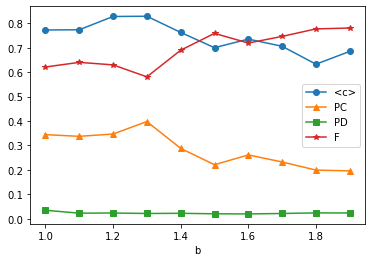

In [66]:
pcs_ = [pcs[i][1] for i in range(len(pcs))]
pds_ = [pds[i][1] for i in range(len(pds))]
c_means_ = [c_means[i][1] for i in range(len(c_means))]
fs_ = [fs[i][1] for i in range(len(fs))]

plt.plot(bs, c_means_, 'o-', label='<c>')
plt.plot(bs, np.asarray(pcs_) / N, '^-', label='PC')
plt.plot(bs, np.asarray(pds_) / N, 's-', label='PD')
plt.plot(bs, np.asarray(fs_) / N, '*-', label='F')
plt.legend()
plt.xlabel('b')
plt.savefig('pic01.png')
plt.show()